In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sn

In [75]:
df = pd.read_csv("../data/insurance_simple_regression.csv")
df

,Age,Premium
0,18,10000
1,22,15000
2,23,18000
3,26,21000
4,28,24000
5,31,26500
6,33,27000


In [76]:
df.shape

(7, 2)

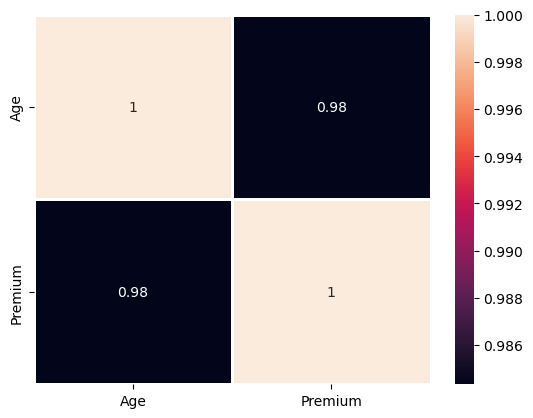

In [77]:
sn.heatmap(df.corr(), annot=True, linewidths=0.9);

In [82]:
X = np.array(df.Age).reshape(-1, 1)
y = np.array(df.Premium).reshape(-1, 1)

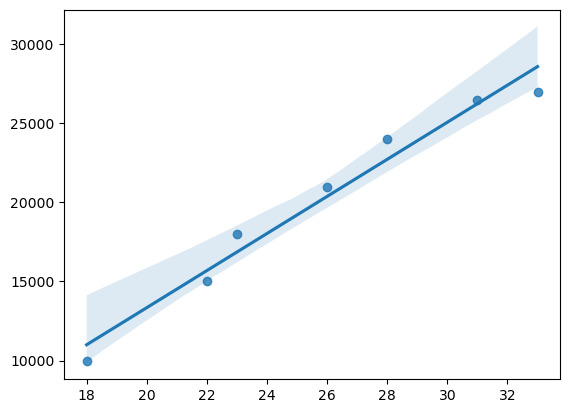

In [83]:
sn.regplot(data=df, x=X, y=y, fit_reg=True);

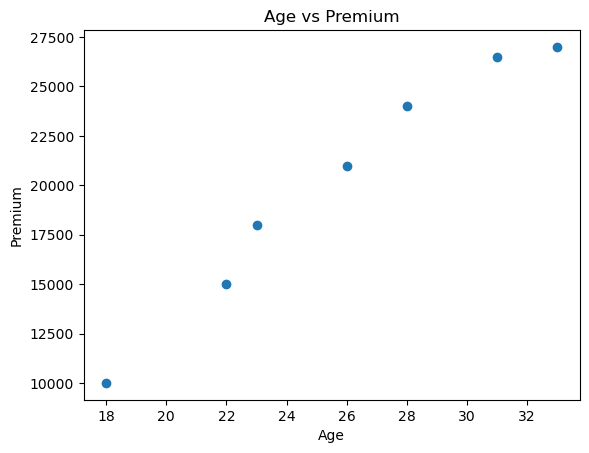

In [84]:
plt.scatter(X, y)
plt.title("Age vs Premium")
plt.xlabel("Age")
plt.ylabel("Premium");

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [101]:
regr = LinearRegression().fit(X_train, y_train)
y_preds = regr.predict(X_test)
regr.score(X_test, y_test)

0.935046708883721

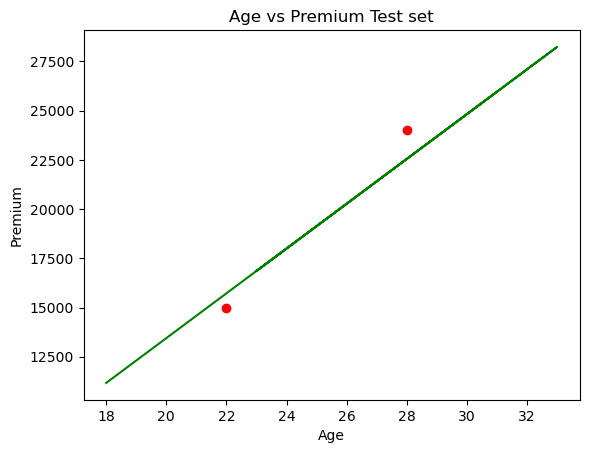

In [103]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regr.predict(X_train), color = 'green')
plt.title("Age vs Premium Test set")
plt.xlabel("Age")
plt.ylabel("Premium")
plt.show()

In [105]:
score_dict = {
    "MAE": mean_absolute_error(y_test, y_preds),
    "MSE": mean_squared_error(y_test, y_preds),
    "R2": r2_score(y_test, y_preds),
    "MSEF": mean_squared_error(y_test, y_preds, squared=False)
}

score_dict

{'MAE': 1087.1934604904636,
 'MSE': 1315304.14510465,
 'R2': 0.935046708883721,
 'MSEF': 1146.8671000184154}